# Homework7
## Ziyan Hu

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## Q1

In [42]:
# 1a.
# initialize gamma distribution with shape = 1
dist = stats.gamma(a=1)

Mean: 1.0
Median: 0.6931471805599455
Variance: 1.0
Std: 1.0


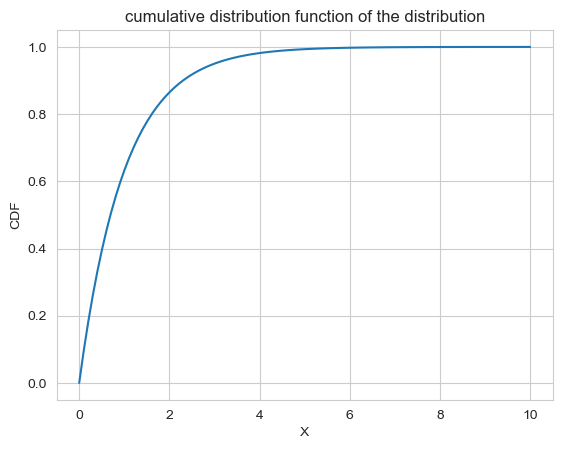

In [43]:
# 1b.
# plot CDF
x = np.linspace(0, 10, 100)
plt.plot(x, dist.cdf(x))
plt.title("cumulative distribution function of the distribution")
plt.xlabel("X")
plt.ylabel("CDF")

# compute statistics
print("Mean:", dist.mean())
print("Median:", dist.median())
print("Variance:", dist.var())
print("Std:", dist.std())

In [44]:
# 1c.
# compute entropy
H = dist.entropy()
print("Entropy:", H)

Entropy: 1.0


  Bonus: Compute entropy by hand
  H(x) = -∫ p(x)ln(p(x)) dx
  p(x) = (1/Γ(α))β^α x^(α-1) e^(-βx)
  For α = 1, β = 1, Γ(1) = 1
  Therefore, p(x) = e^(-x)
  H(x) = -∫ e^(-x)ln(e^(-x)) dx
       = -∫ e^(-x)(-x) dx
       = ∫ x e^(-x) dx
       = -E[-ln(X)]
       = 1
  Matches scipy output

In [45]:
# 1d.
# compute E(X^2)
EX2 = dist.moment(2)
print("E(X^2):", EX2)

E(X^2): 2.0


  Bonus: Compute E(X^2) by hand
  For α = 1, β = 1
  E(X^2) = α(α + 1)/β^2 = 2
  Matches scipy output

Estimated shape: 0.953768019521464


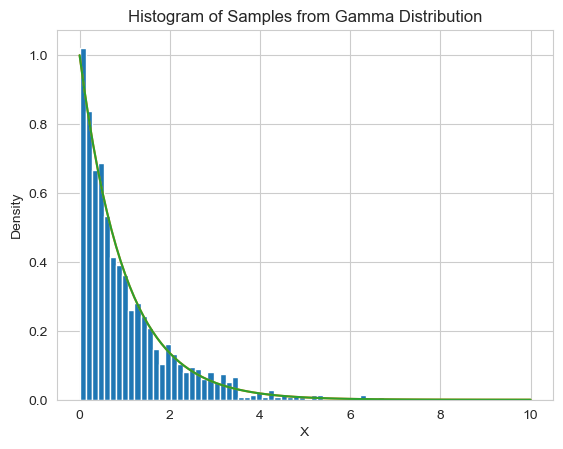

In [46]:
# 1f.
# draw samples and plot
samples = dist.rvs(1000)
plt.hist(samples, bins=50, density=True)
x = np.linspace(0, 10, 100)
plt.plot(x, dist.pdf(x))
plt.plot(x, stats.gamma.pdf(x, 1))
plt.title("Histogram of Samples from Gamma Distribution")
plt.xlabel("X")
plt.ylabel("Density")

# estimate shape parameter
shape_est = stats.gamma.fit(samples)[0]
print("Estimated shape:", shape_est)

## Q2

In [47]:
# load the data set and show the first five rows
brain_size = pd.read_csv('brain_size.csv',sep=';')
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [48]:
# 2a.
# quadratic mean, geometric mean, harmonic mean for FSIQ
qmean = stats.pmean(brain_size['FSIQ'], p=2, axis=0)
gmean = stats.gmean(brain_size['FSIQ'],axis=0)
hmean = stats.hmean(brain_size['FSIQ'], axis=0)
qmean,gmean,hmean

(115.91527077999689, 110.86997745448716, 108.27291625893908)

In [49]:
# quadratic mean, geometric mean, harmonic mean for VIQ
qmean = stats.pmean(brain_size['VIQ'], p=2, axis=0)
gmean = stats.gmean(brain_size['VIQ'],axis=0)
hmean = stats.hmean(brain_size['VIQ'], axis=0)
qmean,gmean,hmean

(114.74449877880856, 109.89201277160073, 107.44025770660657)

In [50]:
# quadratic mean, geometric mean, harmonic mean for PIQ
qmean = stats.pmean(brain_size['PIQ'], p=2, axis=0)
gmean = stats.gmean(brain_size['PIQ'],axis=0)
hmean = stats.hmean(brain_size['PIQ'], axis=0)
qmean,gmean,hmean

(113.22047076390382, 108.72152651613867, 106.36949921280362)

In [51]:
# 2b.
# skewness, kurtosis, IQR, median for FSIQ
skew = stats.skew(brain_size['FSIQ'], axis=0)
kurtosis = stats.kurtosis(brain_size['FSIQ'], axis=0)
iqr = stats.iqr(brain_size['FSIQ'], axis=0)
median = stats.median_abs_deviation(brain_size['FSIQ'], axis=0)
skew,kurtosis,iqr,median

(-0.1201221653008149, -1.743999460767122, 45.75, 22.5)

In [52]:
# skewness, kurtosis, IQR, median for VIQ
skew = stats.skew(brain_size['VIQ'], axis=0)
kurtosis = stats.kurtosis(brain_size['VIQ'], axis=0)
iqr = stats.iqr(brain_size['VIQ'], axis=0)
median = stats.median_abs_deviation(brain_size['VIQ'], axis=0)
skew,kurtosis,iqr,median

(0.07095935735493311, -1.35080775473528, 39.75, 19.5)

In [53]:
# skewness, kurtosis, IQR, median for PIQ
skew = stats.skew(brain_size['PIQ'], axis=0)
kurtosis = stats.kurtosis(brain_size['PIQ'], axis=0)
iqr = stats.iqr(brain_size['PIQ'], axis=0)
median = stats.median_abs_deviation(brain_size['PIQ'], axis=0)
skew,kurtosis,iqr,median

(-0.09736917025377417, -1.2857921297217902, 39.75, 18.0)

In [54]:
# 2c.
# standard error of the mean and coefficient of variation of FSIQ
sem = stats.sem(brain_size['FSIQ'], axis=0)
cv = stats.variation(brain_size['FSIQ'], axis=0, ddof=1, nan_policy='omit')
sem,cv

(3.8077097901696555, 0.2122703500371605)

In [55]:
# standard error of the mean and coefficient of variation of VIQ
sem = stats.sem(brain_size['VIQ'], axis=0)
cv = stats.variation(brain_size['VIQ'], axis=0, ddof=1, nan_policy='omit')
sem,cv

(3.7340343893050605, 0.21020121996617483)

In [56]:
# standard error of the mean and coefficient of variation of PIQ
sem = stats.sem(brain_size['PIQ'], axis=0)
cv = stats.variation(brain_size['PIQ'], axis=0, ddof=1, nan_policy='omit')
sem,cv

(3.5529849314452377, 0.20239630489753038)

In [57]:
# 2d.
# rank within FSIQ
stats.rankdata(brain_size['FSIQ'], axis=0, method='average')

array([26. , 36. , 33.5, 26. , 31. , 16. , 32. , 13. ,  9.5, 26. , 22.5,
       38.5, 29.5, 36. , 14. ,  5. , 22.5, 17. , 18. ,  2. ,  5. , 15. ,
       29.5, 33.5, 12. , 38.5,  7. , 19.5,  1. , 21. , 26. , 40. , 19.5,
       11. ,  5. , 26. , 36. ,  8. ,  3. ,  9.5])

In [58]:
# rank within VIQ
stats.rankdata(brain_size['VIQ'], axis=0, method='average')

array([32. , 39. , 23. , 28. , 32. ,  9. , 34. ,  9. , 13. , 21. , 28. ,
       39. , 28. , 22. , 18. ,  1. , 32. , 15.5, 20. ,  2. ,  3.5, 19. ,
       28. , 36. ,  5.5, 36. ,  9. , 15.5,  3.5, 24.5, 24.5, 36. , 15.5,
       15.5,  9. , 28. , 39. ,  5.5,  9. , 12. ])

In [59]:
# rank within PIQ
stats.rankdata(brain_size['PIQ'], axis=0, method='average')

array([24.5, 24.5, 40. , 29.5, 35.5, 19. , 32.5, 15. ,  5.5, 38.5, 24.5,
       29.5, 24.5, 38.5, 12. , 14. , 21. , 16.5,  5.5,  9. ,  9. ,  5.5,
       35.5, 29.5, 16.5, 32.5,  5.5, 19. ,  1. , 24.5, 34. , 37. , 19. ,
        9. ,  3. , 29.5, 24.5, 13. ,  2. , 11. ])

# Q3

In [60]:
# load the data set from the seaborn package
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [61]:
# 3a.
# hypothesis test of 'bill_length_mm'
print(stats.ttest_1samp(penguins['bill_length_mm'], 40))

Ttest_1sampResult(statistic=13.323468641446198, pvalue=9.738594433242394e-33)


Since p-value is less than 0.05, therefore we reject the null hypothesis that mean value is 40. Mean value of 'bill_length_mm' is not 40.

In [62]:
print(stats.wilcoxon(penguins['bill_depth_mm'] - 17))

WilcoxonResult(statistic=23464.5, pvalue=0.15330199637356948)


Since p-value is gretaer than 0.05, therefore we cannot reject the null hypothesis that median value is 17. Median value of 'bill_length_mm' is 17.


In [63]:
stats.normaltest(penguins['bill_length_mm'])

NormaltestResult(statistic=37.265508666870375, pvalue=8.089051684631696e-09)

Since p-value is less than 0.05, therefore we reject the null hypothesis that it is a normal distribution. ‘bill length mm’ does not follow a normal distribution

In [64]:
# 3b.
# the prevalence of Adelie penguins
print(stats.binom_test(len(penguins[penguins['species'] == 'Adelie']),
                       len(penguins), p=0.5))

0.028229436567543884


We reject the null hypothesis that the prevalence of Adelie penguins is greater then 50%.

In [65]:
# the proportions of the three species (Adelie, Gentoo, Chinstrap)
print(stats.chisquare([len(penguins[penguins['species'] == 'Adelie']),
                       len(penguins[penguins['species'] == 'Gentoo']),
                       len(penguins[penguins['species'] == 'Chinstrap'])],
                      [0.4*len(penguins), 0.4*len(penguins), 0.2*len(penguins)]))

Power_divergenceResult(statistic=2.773273273273273, pvalue=0.24991444576320904)


The proportions of the three species (Adelie, Gentoo, Chinstrap) are 0.4, 0.4, 0.2 since p-value is greater than 0.05 we cannot reject the null hypothesis

In [66]:
# 3c.
# test the association
res = ols('flipper_length_mm ~ bill_length_mm', penguins).fit()
print(res.summary())
print(stats.pearsonr(penguins['bill_length_mm'], penguins['flipper_length_mm']))
print(stats.spearmanr(penguins['bill_length_mm'], penguins['flipper_length_mm']))

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.21e-42
Time:                        16:31:42   Log-Likelihood:                -1258.6
No. Observations:                 333   AIC:                             2521.
Df Residuals:                     331   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        127.3304      4.729     26.

In [67]:
# 3d.
tab = pd.crosstab(index=penguins['species'], columns=penguins['island'])
# Chi-square test of independence
print(stats.chi2_contingency(tab))

(284.5900126880923, 2.2818915409873682e-60, 4, array([[71.46546547, 53.92792793, 20.60660661],
       [33.28528529, 25.11711712,  9.5975976 ],
       [58.24924925, 43.95495495, 16.7957958 ]]))


p-value is less than 0.05, we reject the null hypothesis that species is independent of island.

In [68]:
# 3e.
# two sample t-test
stats.ttest_ind(penguins[penguins['sex'] == 'Male']['bill_length_mm'],
                penguins[penguins['sex'] == 'Female']['bill_length_mm'])

Ttest_indResult(statistic=6.667027633163075, pvalue=1.0942555387199209e-10)

In [69]:
# Mann-Whitney U test
stats.mannwhitneyu(penguins[penguins['sex'] == 'Male']['bill_length_mm'],
                   penguins[penguins['sex'] == 'Female']['bill_length_mm'])

MannwhitneyuResult(statistic=19542.0, pvalue=9.901184093608371e-11)

In [70]:
# Wilcoxon rank-sum test
stats.ranksums(penguins[penguins['sex'] == 'Male']['bill_length_mm'],
               penguins[penguins['sex'] == 'Female']['bill_length_mm'])

RanksumsResult(statistic=6.468774411182302, pvalue=9.880096502442061e-11)

p-values of those tests are all less than 0.05, we reject the null hypothesis that two gender group share the same distributions with the same property like mean and median

In [71]:
# 3f.
# One-way ANOVA
print(stats.f_oneway(penguins[penguins['species'] == 'Adelie']['bill_length_mm'],
                     penguins[penguins['species'] == 'Gentoo']['bill_length_mm'],
                     penguins[penguins['species'] == 'Chinstrap']['bill_length_mm']))

F_onewayResult(statistic=397.29943741282796, pvalue=1.3809842053151752e-88)


In [72]:
# Kruskal-Wallis H test
print(stats.kruskal(penguins[penguins['species'] == 'Adelie']['bill_length_mm'],
                    penguins[penguins['species'] == 'Gentoo']['bill_length_mm'],
                    penguins[penguins['species'] == 'Chinstrap']['bill_length_mm']))

KruskalResult(statistic=236.8992355590763, pvalue=3.6139705965512625e-52)


Since p-values of two tests are less than 0.05, therefore we reject the null hypothesis that they have the same mean or median values. Therefore, the median and mean of species Adelie, Gentoo and Chinstrap are not equal.